In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sn

In [2]:
data=pd.read_csv("bankfull.csv",sep=";")

In [3]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
#Selecting columns 
columns=['age','balance','duration','campaign','y']
data=data[columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='age'>

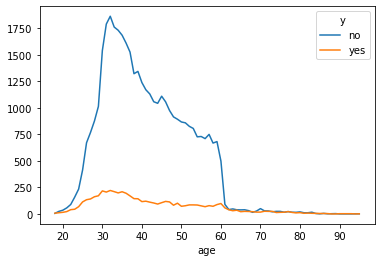

In [6]:
pd.crosstab(data.age,data.y).plot(kind="line")

## Graph shows that age group 20-60 has more rejection of application while 60-90 almost everybody


<AxesSubplot:>

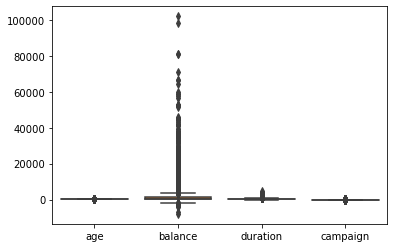

In [7]:
sn.boxplot(data=data,orient="v")

In [8]:
data['outcome']=data.y.map({'no':0,'yes':1})
data.tail(10)

,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


<AxesSubplot:title={'center':'age'}, xlabel='outcome'>

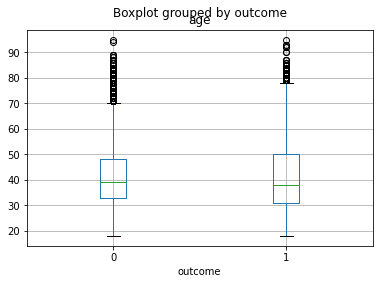

In [9]:
data.boxplot(column='age',by='outcome')

### Probably not agreat feature since lot of outliers

In [10]:
df1=['age','balance','duration','campaign']
output=['outcome']
X=data[df1]
Y=data[output]

In [11]:
classifier=LogisticRegression()

In [12]:
classifier.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [13]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [14]:
classifier.coef_

array([[ 7.69721526e-03,  3.72191064e-05,  3.54908897e-03,
        -1.39828304e-01]])

In [15]:
classifier.predict_proba(X)

array([[0.8736739 , 0.1263261 ],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553764, 0.69446236],
       [0.82336234, 0.17663766],
       [0.86407825, 0.13592175]])

In [16]:
y_pred=classifier.predict(X)

In [17]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix=confusion_matrix(Y,y_pred)

In [20]:
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [21]:
import matplotlib.pyplot as plt

Text(0.5, 15.0, 'Predicted label')

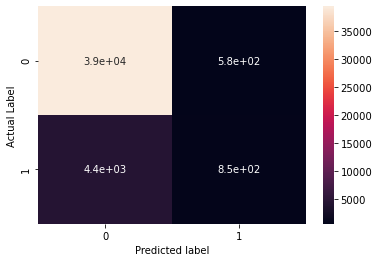

In [22]:
sn.heatmap(confusion_matrix,annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')